In [15]:
import numpy as np 
import pandas as pd
df = pd.read_csv("./humidity.csv");
ozo = pd.read_csv("./ozoneFinal.csv");
df

,Province/State,Country/Region,Lat,Long,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.000000,65.000000,64,97,81,74,94,91,...,52,65,60,71,55,59,70,72,77,70
1,NaN,Albania,41.153300,20.168300,50,46,42,38,57,45,...,76,70,62,51,28,30,31,35,42,46
2,NaN,Algeria,28.033900,1.659600,39,36,28,25,25,23,...,14,13,11,10,12,10,10,8,9,8
3,NaN,Andorra,42.506300,1.521800,31,34,40,55,23,35,...,63,50,56,73,86,82,77,72,73,79
4,NaN,Angola,-11.202700,17.873900,85,91,97,97,86,87,...,90,90,85,82,79,84,76,89,86,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,79,87,86,82,91,90,...,90,88,82,84,88,81,80,80,88,93
260,NaN,South Sudan,6.877000,31.307000,26,28,38,34,23,22,...,39,42,53,48,40,39,45,54,56,62
261,NaN,Western Sahara,24.215500,-12.885800,15,9,13,11,16,14,...,25,55,43,31,31,35,28,32,42,41
262,NaN,Sao Tome and Principe,0.186360,6.613081,89,89,80,74,80,87,...,85,91,81,84,82,89,86,86,89,82


In [16]:
#get all the countries that have at least 10,000 Covid-19 cases from df2
df = df[df['Country/Region'].isin(ozo['Country/Region'])]
df

,Province/State,Country/Region,Lat,Long,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
16,NaN,Austria,47.5162,14.5501,62,47,62,89,88,53,...,69,72,59,56,45,33,45,63,65,69
23,NaN,Belgium,50.8333,4.0000,82,86,86,85,84,78,...,72,62,55,55,64,56,59,60,48,53
28,NaN,Brazil,-14.2350,-51.9253,81,75,80,81,88,93,...,73,74,71,68,70,83,80,81,79,79
35,Alberta,Canada,53.9333,-116.5765,80,95,66,87,78,69,...,75,87,90,94,85,77,65,73,90,69
36,British Columbia,Canada,49.2827,-123.1207,90,83,83,84,82,84,...,72,74,72,63,67,69,68,67,74,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,Recovered,Canada,0.0000,0.0000,74,76,76,68,64,70,...,73,75,71,75,74,77,74,79,76,75
245,Northwest Territories,Canada,64.8255,-124.8457,49,53,67,76,69,66,...,70,72,80,80,84,82,82,85,83,82
246,Yukon,Canada,64.2823,-135.0000,86,89,84,75,64,69,...,82,82,82,88,89,81,87,80,84,89
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,78,77,77,78,78,82,...,78,83,86,84,84,84,83,82,85,83


In [17]:
#remove Province/State column
df = df.drop(columns=['Province/State'])
df.index = range(0,len(df))

In [18]:
#create cleaning list for combining multiple ozone readings in one country
dubs = df['Country/Region'].value_counts() #shows how many times a country occurs in dataframe

i = 0
cleaningList = []
for i in range(0, len(dubs)):
    if dubs[i] > 1: #if country occurs more than once
        cleaningList = cleaningList + [dubs.index[i]] #add to cleaning list
cleaningList

['China', 'Canada', 'France', 'Netherlands']

In [19]:
#This for loop gets the cleaningList Countries and averages the multiple ozone readings

for i in cleaningList:     #gets country from cleaning list
    temp = df[df['Country/Region'] == i]  #create temporary dataframe of selected country
    df = df[df['Country/Region'] != i] #remove all exisiting occurances of selected country
    df.index = range(0, len(df))          #fix index
    df.loc[len(df)] = [i] + list(temp.mean().values) #add the average of mulitple readings to end of ozone dataframe
df

,Country/Region,Lat,Long,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,Austria,47.516200,14.550100,62.000000,47.000000,62.000000,89.000000,88.000000,53.000000,70.000000,...,69.000000,72.000000,59.000000,56.000000,45.000000,33.000000,45.000000,63.000000,65.000000,69.000000
1,Belgium,50.833300,4.000000,82.000000,86.000000,86.000000,85.000000,84.000000,78.000000,85.000000,...,72.000000,62.000000,55.000000,55.000000,64.000000,56.000000,59.000000,60.000000,48.000000,53.000000
2,Brazil,-14.235000,-51.925300,81.000000,75.000000,80.000000,81.000000,88.000000,93.000000,86.000000,...,73.000000,74.000000,71.000000,68.000000,70.000000,83.000000,80.000000,81.000000,79.000000,79.000000
3,Chile,-35.675100,-71.543000,43.000000,44.000000,61.000000,54.000000,52.000000,53.000000,54.000000,...,40.000000,40.000000,48.000000,52.000000,41.000000,39.000000,49.000000,68.000000,70.000000,73.000000
4,Ecuador,-1.831200,-78.183400,89.000000,90.000000,91.000000,90.000000,77.000000,76.000000,76.000000,...,91.000000,79.000000,85.000000,92.000000,88.000000,88.000000,86.000000,93.000000,89.000000,88.000000
5,Germany,51.000000,9.000000,82.000000,84.000000,91.000000,89.000000,91.000000,82.000000,88.000000,...,85.000000,71.000000,63.000000,56.000000,74.000000,63.000000,59.000000,65.000000,54.000000,55.000000
6,India,21.000000,78.000000,82.000000,84.000000,78.000000,74.000000,57.000000,56.000000,56.000000,...,28.000000,48.000000,51.000000,38.000000,25.000000,17.000000,18.000000,23.000000,24.000000,21.000000
7,Iran,32.000000,53.000000,50.000000,40.000000,38.000000,63.000000,48.000000,41.000000,45.000000,...,27.000000,20.000000,13.000000,15.000000,18.000000,56.000000,60.000000,43.000000,43.000000,31.000000
8,Ireland,53.142400,-7.692100,86.000000,86.000000,84.000000,86.000000,86.000000,82.000000,84.000000,...,85.000000,81.000000,83.000000,76.000000,73.000000,72.000000,80.000000,79.000000,78.000000,86.000000
9,Israel,31.000000,35.000000,73.000000,75.000000,57.000000,68.000000,55.000000,49.000000,52.000000,...,45.000000,31.000000,31.000000,67.000000,69.000000,67.000000,66.000000,73.000000,77.000000,63.000000


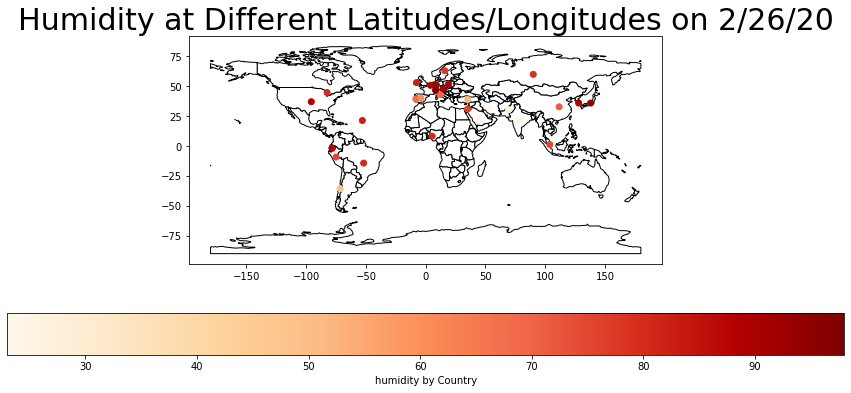

In [20]:
import matplotlib.pyplot as plt

#this is to create exactly one point to have on the graph
from shapely.geometry import Point
#this is to use the longitude and latitude to graph on a world map
import geopandas as gpd
#geometry function is used to plot latitude and longitude on x axis and y axis.
geometry = [Point(xy) for xy in zip(df['Long'], df['Lat'])]
#this spacial frame using the dataframe with the points being df and the previous geometry
gdf = gpd.GeoDataFrame(df, geometry=geometry)   
#this is to get a general world map to print our data on
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#this is to provide a graph using the base world map, with a white background and black borders, seeing a figure size of a 15 width and 6 inches height
base = world.plot(color='white', edgecolor='black',figsize=(15, 6))
#this is to create a title on the base
base.set_title('Humidity at Different Latitudes/Longitudes on 2/26/20', fontsize = 30)
#This is to create an overlap of the world map and the data from the dataframe
gdf.plot(ax=base, column='2/26/20', cmap='OrRd', legend=True,legend_kwds={'label': "humidity by Country", 'orientation': "horizontal"});
#this is to get the graph into a file
plt.savefig('world2.jpg')

In [21]:
df['Lat'].median() #Median of Latitude

36.0

In [22]:
df['Lat'].mode() #Mode of Latitude

0    36.0
dtype: float64

In [23]:
df['Lat'].std() #Standard deviation of Latitude 

23.575548226828634

In [24]:
df['Lat'].var() #Variance of Latitude 

555.8064741955228

In [25]:
df['Lat'].describe() #Description of count, mean, standard deviation, min, interquartile range, max of Latitude

count    29.000000
mean     30.370243
std      23.575548
min     -35.675100
25%      21.408340
50%      36.000000
75%      46.818200
max      63.000000
Name: Lat, dtype: float64

In [26]:
df['3/14/20'].mean() #Mean of 3/14/20

68.63719958202718

In [27]:
df['3/14/20'].median() #Median of 3/14/20

74.0

In [28]:
df['3/14/20'].mode() #Mode of of 3/14/20

0    63.0
1    66.0
dtype: float64

In [29]:
df['3/14/20'].std() #Standard deviation of  3/14/20

21.46723917805192

In [30]:
df['3/14/20'].var() #Variance of 3/14/20

460.8423579276872

In [31]:
df['3/14/20'].describe() #Description of count, mean, standard deviation, min, interquartile-range, max of 3/14/20

count    29.000000
mean     68.637200
std      21.467239
min      10.000000
25%      63.000000
50%      74.000000
75%      82.000000
max      99.000000
Name: 3/14/20, dtype: float64

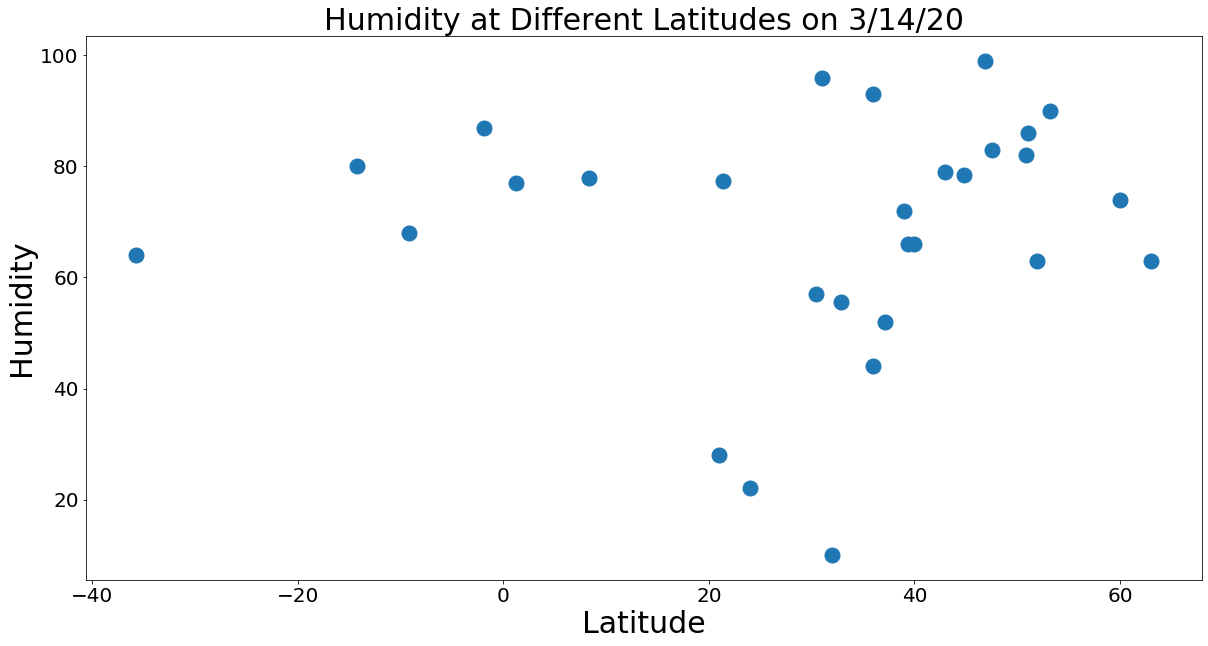

In [32]:
y=df['3/14/20']
x=df.Lat

%matplotlib inline

from matplotlib import pyplot as plt

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot: 
plt.plot(x,y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Humidity', fontsize = 30)
plt.xlabel('Latitude', fontsize = 30)
plt.title('Humidity at Different Latitudes on 3/14/20', fontsize = 30)
# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

In [33]:
import pandas as pd 
import numpy as np 
import statistics as st
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m)) #Slope 
print ('The y-intercept is {:.2f}.'.format(b)) #Y-intercept
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b)) #Simple Linear Regression

The slope of line is 0.07.
The y-intercept is 66.43.
The best fit simple linear regression line is 0.07x + 66.43.


In [34]:
%matplotlib inline

# Code Cell 9
# y coordinate for centroid
y_mean = y.mean()    
# x coordinate for centroid
x_mean = x.mean()
print ('The centroid for this dataset is x = {:.2f} and y = {:.2f}.'.format(x_mean, y_mean))

The centroid for this dataset is x = 30.37 and y = 68.64.


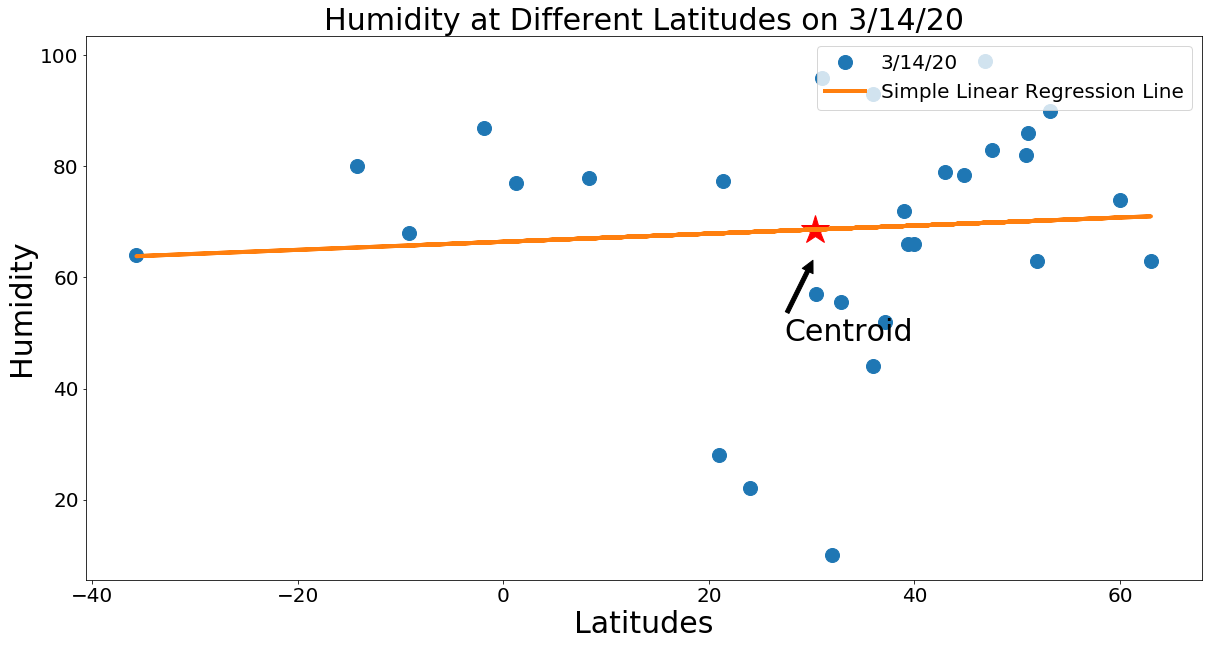

In [35]:
# Code Cell 10
# Create the plot inline
%matplotlib inline
from matplotlib import pyplot as plt
# Enlarge the plot size
plt.figure(figsize=(20,10))

# Plot the scatter plot of the data set
plt.plot(x,y, 'o', markersize = 14, label = "3/14/20") 

# Plot the centroid point
plt.plot(x_mean,y_mean, '*', markersize = 30, color = "r") 

# Plot the linear regression line
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('Humidity', fontsize = 30)
plt.xlabel('Latitudes', fontsize = 30)

# Enlarge x and y tick marks
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Point out the centroid point in the plot
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)
plt.title('Humidity at Different Latitudes on 3/14/20', fontsize = 30)
# Create legend
plt.legend(loc = 'upper right', fontsize = 20)
plt.savefig('humidity1.jpg')

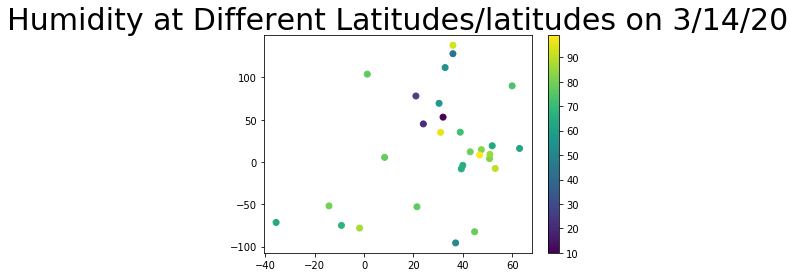

In [36]:
plt.scatter(df['Lat'], df['Long'],c=df['3/14/20'])
plt.title('Humidity at Different Latitudes/latitudes on 3/14/20', fontsize = 30)
plt.colorbar()
plt.show()

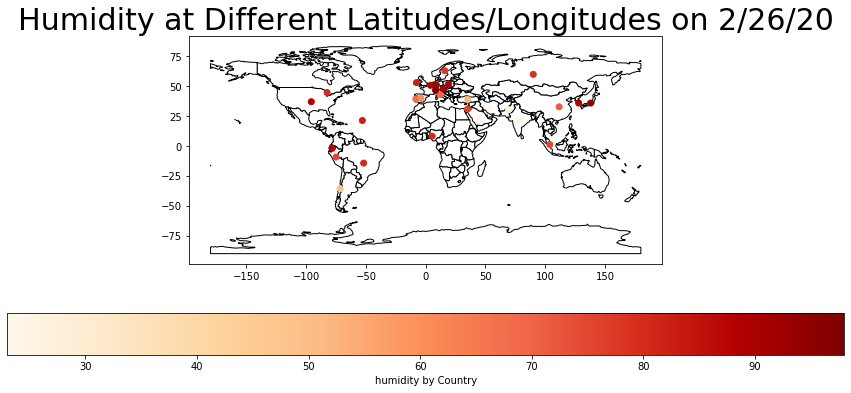

In [37]:
#this is to create exactly one point to have on the graph
from shapely.geometry import Point
#this is to use the longitude and latitude to graph on a world map
import geopandas as gpd
#geometry function is used to plot latitude and longitude on x axis and y axis.
geometry = [Point(xy) for xy in zip(df['Long'], df['Lat'])]
#this spacial frame using the dataframe with the points being df and the previous geometry
gdf = gpd.GeoDataFrame(df, geometry=geometry)   
#this is to get a general world map to print our data on
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#this is to provide a graph using the base world map, with a white background and black borders, seeing a figure size of a 15 width and 6 inches height
base = world.plot(color='white', edgecolor='black',figsize=(15, 6))
#this is to create a title on the base
base.set_title('Humidity at Different Latitudes/Longitudes on 2/26/20', fontsize = 30)
#This is to create an overlap of the world map and the data from the dataframe
gdf.plot(ax=base, column='2/26/20', cmap='OrRd', legend=True,legend_kwds={'label': "humidity by Country", 'orientation': "horizontal"});
#this is to get the graph into a file
plt.savefig('world2.jpg')

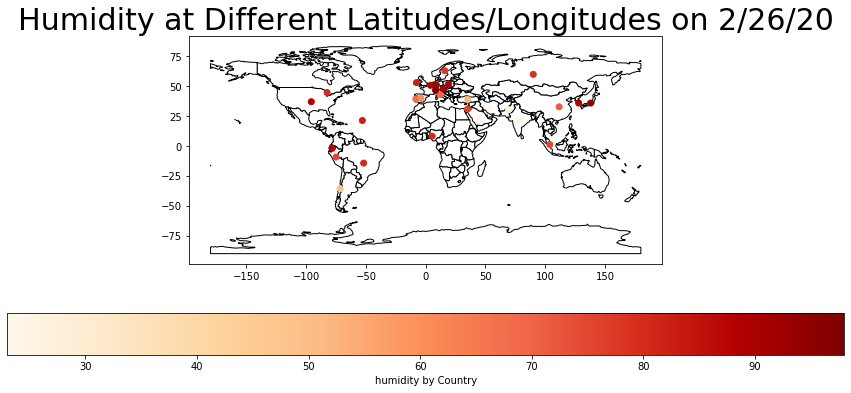

In [38]:
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
geometry = [Point(xy) for xy in zip(df['Long'], df['Lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black',figsize=(15, 6))
base.set_title('Humidity at Different Latitudes/Longitudes on 2/26/20', fontsize = 30)
gdf.plot(ax=base, column='2/26/20', cmap='OrRd', legend=True,legend_kwds={'label': "humidity by Country", 'orientation': "horizontal"});
plt.savefig('world2.jpg')

In [39]:
#Function to predict humidity of countries' latitudes greater than 20 on 3/14/20
def predict(query):
    if query >= 1:
        predict = m * query + b
        return predict
    else:
        print ("You must predict humidity of latitude of countries greater than 20 at 3/14/20.")

In [40]:
predict(20)

67.88314151800527

In [41]:
import pandas as pd 
import numpy as np
df = pd.read_csv("./humidity.csv");
df.head(107)

,Province/State,Country/Region,Lat,Long,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.0000,65.0000,64,97,81,74,94,91,...,52,65,60,71,55,59,70,72,77,70
1,NaN,Albania,41.1533,20.1683,50,46,42,38,57,45,...,76,70,62,51,28,30,31,35,42,46
2,NaN,Algeria,28.0339,1.6596,39,36,28,25,25,23,...,14,13,11,10,12,10,10,8,9,8
3,NaN,Andorra,42.5063,1.5218,31,34,40,55,23,35,...,63,50,56,73,86,82,77,72,73,79
4,NaN,Angola,-11.2027,17.8739,85,91,97,97,86,87,...,90,90,85,82,79,84,76,89,86,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,NaN,Estonia,58.5953,25.0136,82,83,84,84,78,91,...,90,72,62,74,65,64,69,66,65,85
103,NaN,Eswatini,-26.5225,31.4659,73,72,71,68,66,69,...,72,89,69,49,53,67,86,74,67,45
104,NaN,Ethiopia,9.1450,40.4897,57,63,52,52,50,61,...,63,64,51,37,30,36,42,47,55,74
105,NaN,Fiji,-17.7134,178.0650,87,74,76,78,77,80,...,91,90,92,94,92,94,85,92,86,84


In [42]:
df['Lat'].mean() #Mean fo Latitude

21.317325821969693

In [43]:
df['Lat'].median() #Median of Latitude 

23.4881

In [44]:
df['Lat'].mode() #Mode of Latitude 

0    0.0
dtype: float64

In [45]:
df['Lat'].std() #Standard deviation of Latitude 

24.734994144886024

In [46]:
df['Lat'].var() #Variance of Latitude

611.8199353475459

In [47]:
df['Lat'].describe() #Description of count, mean, standard deviation, min, interquartile-range, max of Latitude

count    264.000000
mean      21.317326
std       24.734994
min      -51.796300
25%        6.969250
50%       23.488100
75%       41.166075
max       71.706900
Name: Lat, dtype: float64

In [48]:
df['2/6/20'].mean() #Mean of 2/6/20

67.15151515151516

In [49]:
df['2/6/20'].median() #Median of 2/6/20

74.0

In [50]:
df['2/6/20'].mode() #Mode of 2/6/20

0    80
dtype: int64

In [51]:
df['2/6/20'].std() #Standard Deviation of 2/6/20

21.223949757831683

In [52]:
df['2/6/20'].var() #Variance of 2/6/20

450.4560433229635

In [53]:
df['2/6/20'].describe() #Description of count, mean, standard deviation, min, interquartile-range, max of 2/6/20

count    264.000000
mean      67.151515
std       21.223950
min        3.000000
25%       58.500000
50%       74.000000
75%       81.000000
max       97.000000
Name: 2/6/20, dtype: float64

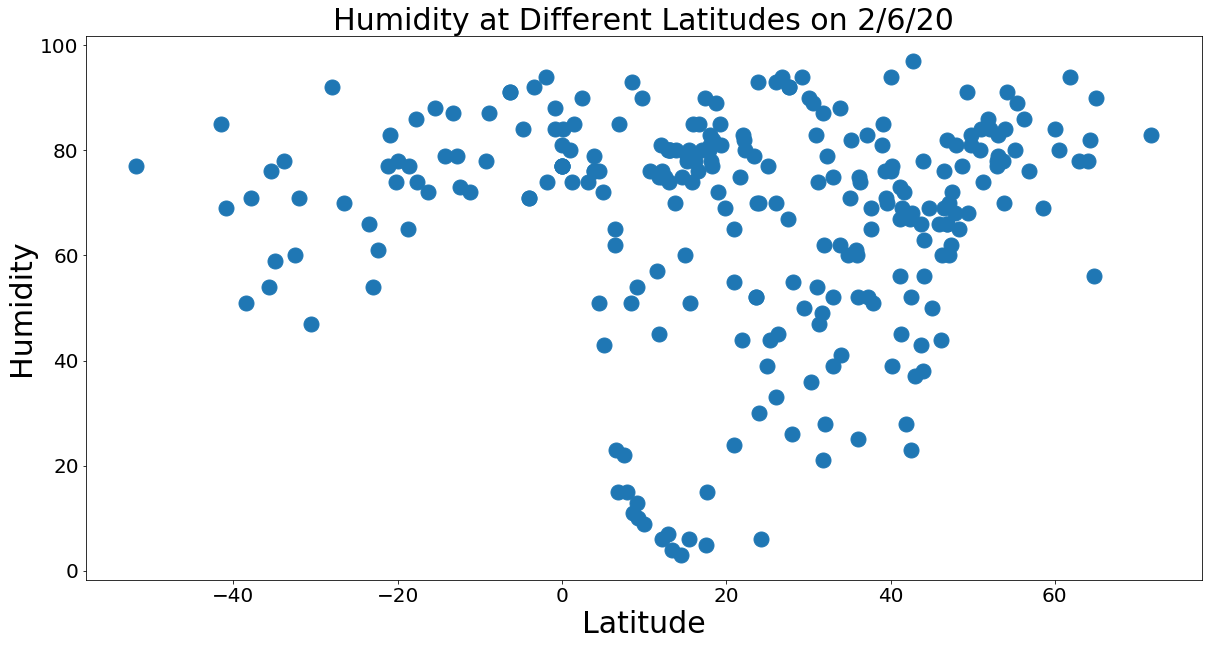

In [54]:
y=df['2/6/20']
x=df.Lat

%matplotlib inline

from matplotlib import pyplot as plt

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot: Latitude vs 2/6/20
plt.plot(x,y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Humidity', fontsize = 30)
plt.xlabel('Latitude', fontsize = 30)
plt.title('Humidity at Different Latitudes on 2/6/20', fontsize = 30)
# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

In [55]:
import pandas as pd 
import numpy as np 
import statistics as st
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m)) #Slope 
print ('The y-intercept is {:.2f}.'.format(b)) #Y-intercept
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b)) #Simple Linear Regression

The slope of line is 0.01.
The y-intercept is 67.04.
The best fit simple linear regression line is 0.01x + 67.04.


In [56]:
%matplotlib inline

# Code Cell 9
# y coordinate for centroid
y_mean = y.mean()    
# x coordinate for centroid
x_mean = x.mean()
print ('The centroid for this dataset is x = {:.2f} and y = {:.2f}.'.format(x_mean, y_mean))

The centroid for this dataset is x = 21.32 and y = 67.15.


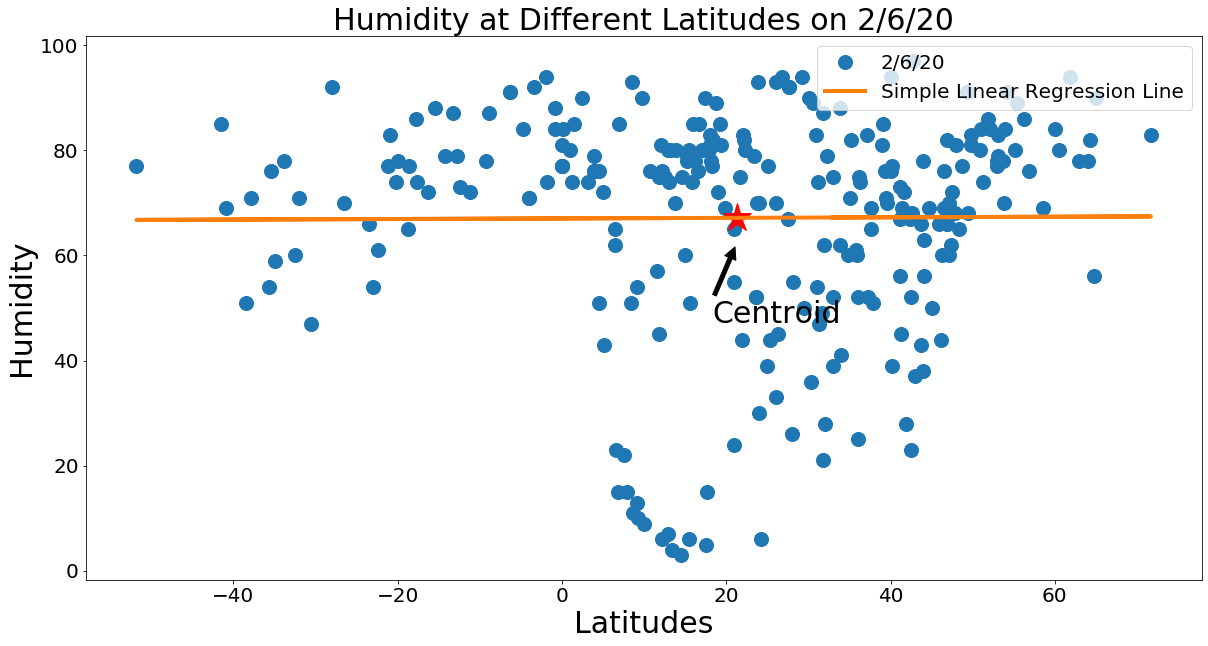

In [57]:
#same thing as previous one
# Code Cell 10
# Create the plot inline
%matplotlib inline
from matplotlib import pyplot as plt
# Enlarge the plot size
plt.figure(figsize=(20,10))

# Plot the scatter plot of the data set
plt.plot(x,y, 'o', markersize = 14, label = "2/6/20") 

# Plot the centroid point
plt.plot(x_mean,y_mean, '*', markersize = 30, color = "r") 

# Plot the linear regression line
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('Humidity', fontsize = 30)
plt.xlabel('Latitudes', fontsize = 30)

# Enlarge x and y tick marks
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Point out the centroid point in the plot
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)
plt.title('Humidity at Different Latitudes on 2/6/20', fontsize = 30)
# Create legend
plt.legend(loc = 'upper right', fontsize = 20)
plt.savefig('humidi2.jpg')

In [58]:
#Function to predict humidity of countries' latitudes greater than 20 on 2/6/20
def predict(query):
    if query >= 1:
        predict = m * query + b
        return predict
    else:
        print ("You must predict humidity of latitude of countries greater than 20 at 2/6/20.")

In [59]:
predict(20)

67.14443677641003